# **YULU BUSINESS CASE STUDY**

---
---
---

## **PROBLEM STATEMENT**

Yulu is **India's leading micro-mobility platform** that provides electric cycles and scooters for short-distance urban travel. **The company aims to optimize fleet utilization by understanding the factors that affect rental demand**.

This analysis focuses on exploring Yulu’s rental data to identify patterns and relationships influencing the number of electric cycles rented. Specifically, it seeks to determine whether:

1.  The number of electric cycles rented differs between working and non-working days.
2.  The rental counts vary significantly across different weather conditions and seasons.
3.  Weather conditions are dependent on the season.

To address these questions, **exploratory data analysis** and **hypothesis testing** (**2-sample t-test, ANOVA, and chi-square test**) are performed on the given dataset containing variables such as datetime, season, workingday, weather, temperature, humidity, windspeed, and rental counts.

## **MODULES' IMPORT**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

---

## **DATA IMPORT**

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

--2025-10-19 09:24:02--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.183, 108.157.172.176, 108.157.172.173, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089.1’

bike_sharing.csv?16 100%[===================>] 633.16K  --.-KB/s    in 0.05s   

2025-10-19 09:24:02 (12.1 MB/s) - ‘bike_sharing.csv?1642089089.1’ saved [648353/648353]



In [ ]:
df = pd.read_csv('bike_sharing.csv?1642089089')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# season :: 1: spring, 2: summer, 3: fall, 4: winter
# weather:: 1: clear, 2: mist, 3: light rain/snow, 4: heavy rain/snow

## **BASIC METRICS**

In [ ]:
df.dtypes # checking the structure & characteristics of the dataset

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
df.isna().sum() # 0 => No NULL values => clean data

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


---

## **DATA PREPARATION**

### **1.  Parse datetime column correctly**

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

The datetime column was converted into a proper datetime object to facilitate efficient extraction of temporal components such as day, month, and hour.

### **2.  Convert categorical fields to category data type**

In [ ]:
cat_cols = ['season','holiday','workingday','weather']
for col in cat_cols:
  df[col] = df[col].astype('category')

Casting these columns to the category type improves memory efficiency and explicitly indicates to the statistical models that they represent nominal or ordinal attributes.

---

## **EXPLORATORY DATA ANALYSIS (EDA)**

### **1. Numeric Summary**

In [ ]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


### **2. Univariate Analysis — Continuous Variables**

**Histograms** display the distribution of **continuous variables** — whether they are symmetric, skewed, or contain outliers.

The **kde=True option** overlays a **smooth density curve** to visualize the **shape of the distribution**.

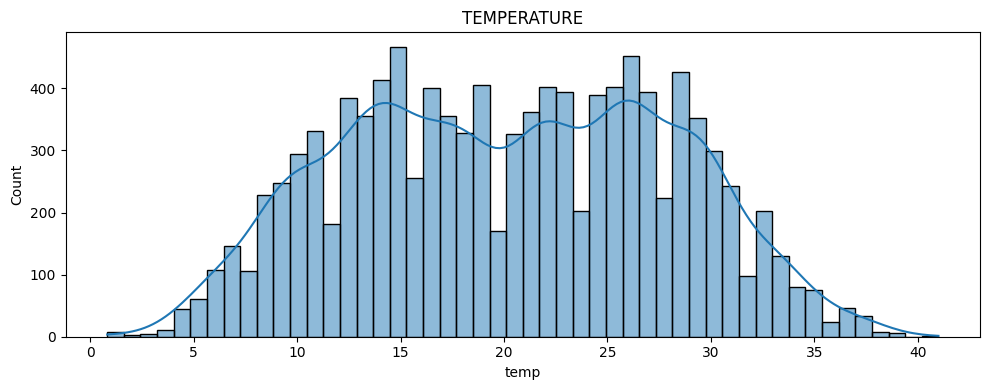

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(10,4))
sns.histplot(data=df,x='temp',ax=axis,bins=50,kde=True)
axis.set_title('TEMPERATURE')
plt.tight_layout()
plt.show()

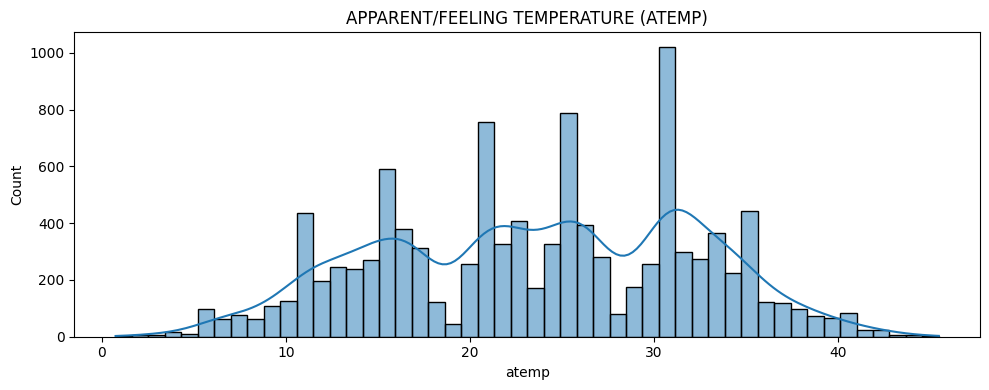

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(10,4))
sns.histplot(data=df,x='atemp',ax=axis,bins=50,kde=True)
#In the Yulu dataset, atemp stands for "feeling temperature" or "apparent temperature"
axis.set_title('APPARENT/FEELING TEMPERATURE (ATEMP)')
plt.tight_layout()
plt.show()

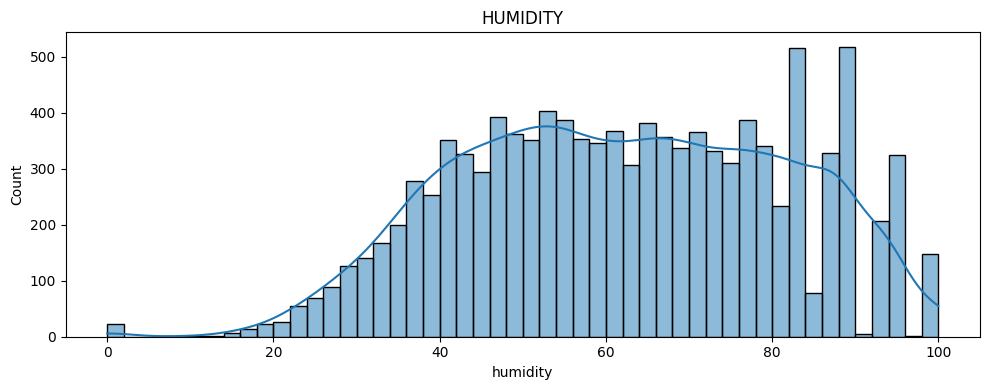

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(10,4))
sns.histplot(data=df,x='humidity',ax=axis,bins=50,kde=True)
axis.set_title('HUMIDITY')
plt.tight_layout()
plt.show()

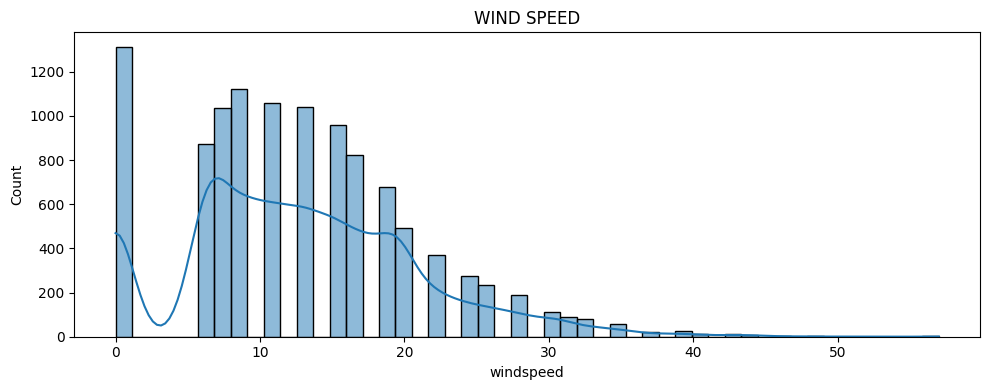

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(10,4))
sns.histplot(data=df,x='windspeed',ax=axis,bins=50,kde=True)
axis.set_title('WIND SPEED')
plt.tight_layout()
plt.show()

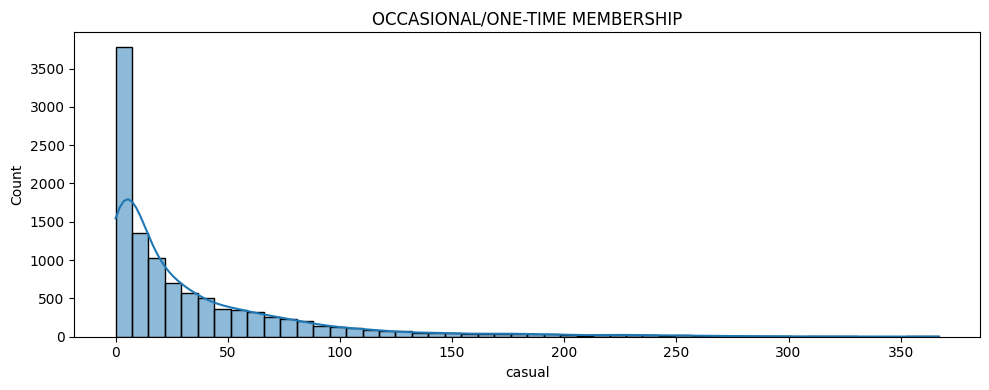

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(10,4))
sns.histplot(data=df,x='casual',ax=axis,bins=50,kde=True)
# In the Yulu dataset, casual refers to the count of users who rented bikes without a registered membership.
axis.set_title('OCCASIONAL/ONE-TIME MEMBERSHIP')
plt.tight_layout()
plt.show()

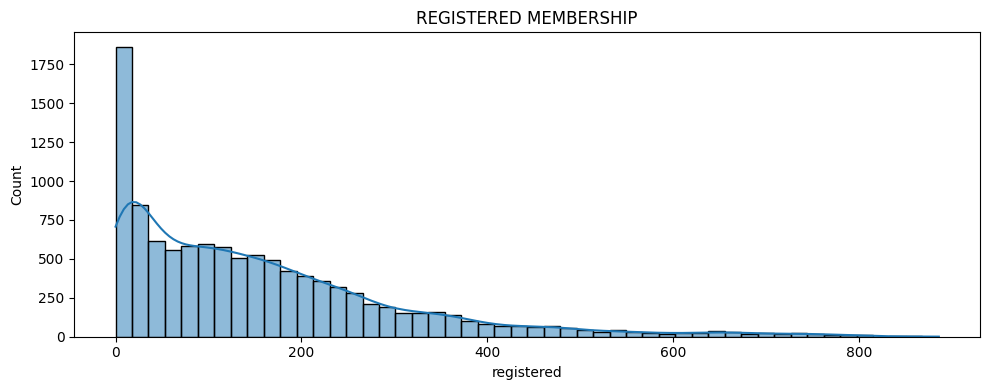

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(10,4))
sns.histplot(data=df,x='registered',ax=axis,bins=50,kde=True)
# In the Yulu dataset, registered refers to the count of users who rented bikes with a registered membership.
axis.set_title('REGISTERED MEMBERSHIP')
plt.tight_layout()
plt.show()

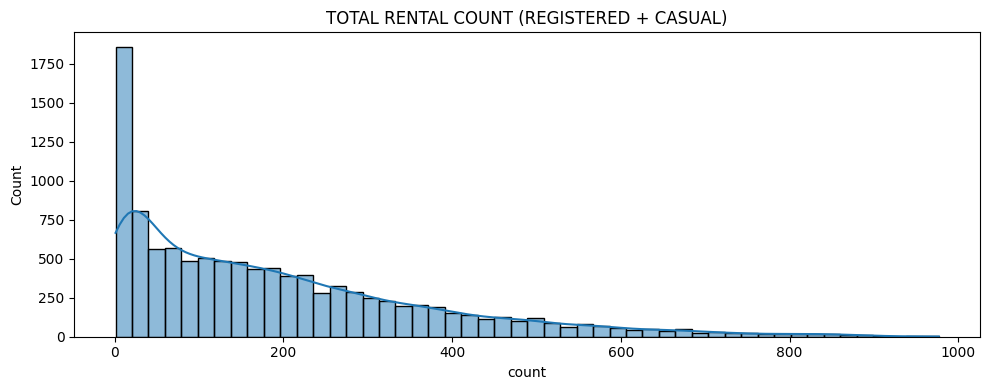

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(10,4))
sns.histplot(data=df,x='count',ax=axis,bins=50,kde=True)
axis.set_title('TOTAL RENTAL COUNT (REGISTERED + CASUAL)')
plt.tight_layout()
plt.show()

### **3. Univariate Analysis — Categorical Variables**

**Countplots** show the **frequency** of each category — helping us understand which season or weather type occurs most frequently.

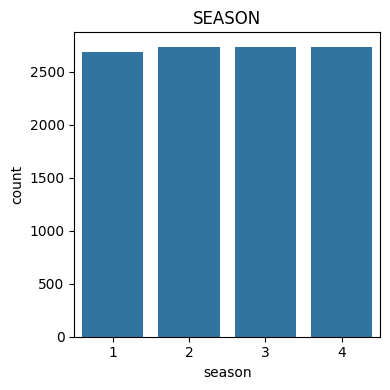

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(4,4))
sns.countplot(data=df,x='season',ax=axis)
axis.set_title('SEASON')
plt.tight_layout()
plt.show()

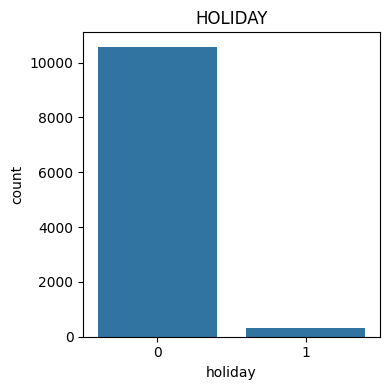

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(4,4))
sns.countplot(data=df,x='holiday',ax=axis)
axis.set_title('HOLIDAY')
plt.tight_layout()
plt.show()

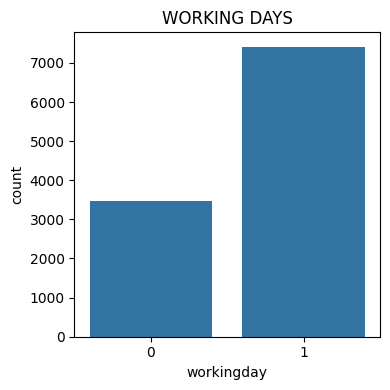

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(4,4))
sns.countplot(data=df,x='workingday',ax=axis)
axis.set_title('WORKING DAYS')
plt.tight_layout()
plt.show()

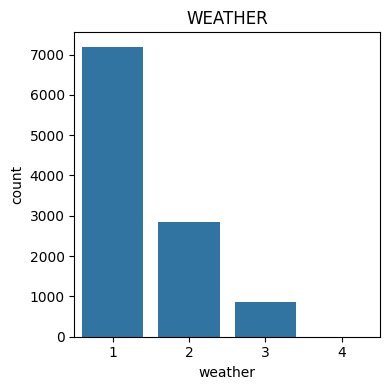

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(4,4))
sns.countplot(data=df,x='weather',ax=axis)
axis.set_title('WEATHER')
plt.tight_layout()
plt.show()

### **4. Bivariate Analysis — Boxplots**

**Boxplots** visualize how the distribution of count (dependent variable) changes across different categories such as workingday, season, and weather. They reveal **median differences, spread, and potential outliers** — essential for deciding which factors might influence rental counts

In [ ]:
# Establishing a relation between the dependent and independent variable
# Dependent : "count"
# Independent: "workingday", "weather", "season"

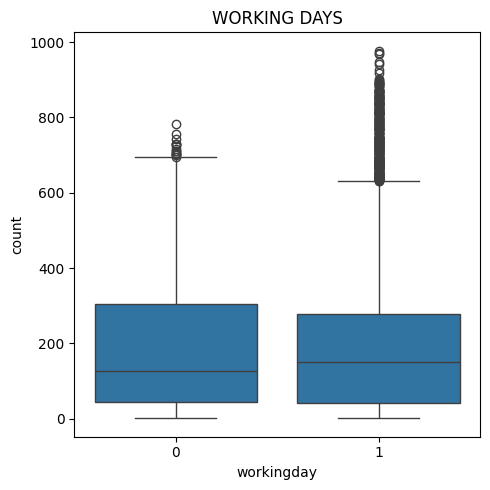

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(5,5))
sns.boxplot(data=df,x='workingday',y='count',ax=axis)
axis.set_title('WORKING DAYS')
plt.tight_layout()
plt.show()

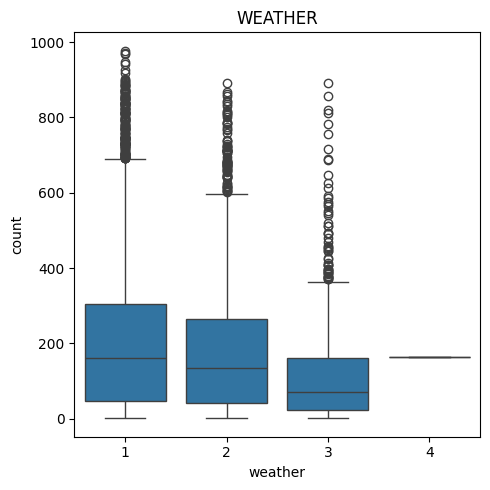

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(5,5))
sns.boxplot(data=df,x='weather',y='count',ax=axis)
axis.set_title('WEATHER')
plt.tight_layout()
plt.show()

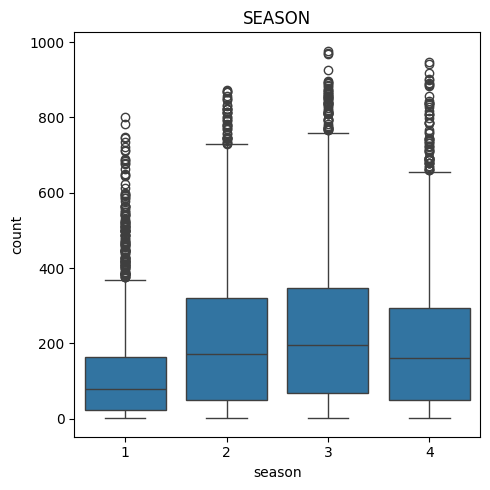

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(5,5))
sns.boxplot(data=df,x='season',y='count',ax=axis)
axis.set_title('SEASON')
plt.tight_layout()
plt.show()

### **5. Bivariate Analysis — Scatter Plot**

The **scatterplot** helps detect the **correlation between continuous variables**. For instance, as temperature increases, the rental count might also rise — indicating weather comfort influences user behavior.

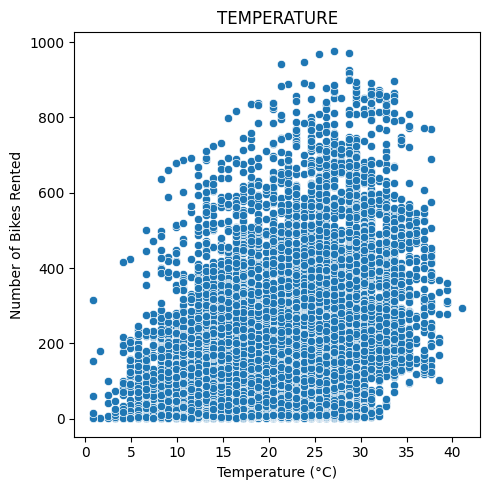

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(5,5))
sns.scatterplot(data=df,x='temp',y='count',ax=axis)
axis.set_title('TEMPERATURE')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Bikes Rented')
plt.tight_layout()
plt.show()

---

## **HYPOTHESIS TESTING**

In [ ]:
# Set a significance level (alpha) at 95% confidence level
alpha = 0.05

### **1. Effect of Working Day on Rental Count: 2-SAMPLE T-TEST**

#### **Defining Hypotheses**

**H₀:** Mean number of bikes rented is the same on working and non-working days.

**H₁:** Mean number of bikes rented differs between working and non-working days.

#### **Test Assumptions**

*   Normality of Data
*   Homogeneity of Variances (Equal Variance Assumption)
*   Independence of Observations

#### **Hypothesis Testing**

In [ ]:
# Split data into two groups
workday = df[df['workingday'] == 1]['count']
non_workday = df[df['workingday'] == 0]['count']
print(workday.shape,non_workday.shape)

(7412,) (3474,)


In [ ]:
# Check normality (Shapiro-Wilk test)
shapiro_workday = stats.shapiro(workday.sample(500))
shapiro_nonwork = stats.shapiro(non_workday.sample(500))
print("Shapiro-Wilk test p-value for workday:",shapiro_workday.pvalue)
print("Shapiro-Wilk test p-value for non-workday:",shapiro_nonwork.pvalue)

Shapiro-Wilk test p-value for workday: 2.845518369489204e-19
Shapiro-Wilk test p-value for non-workday: 4.814484088177835e-19


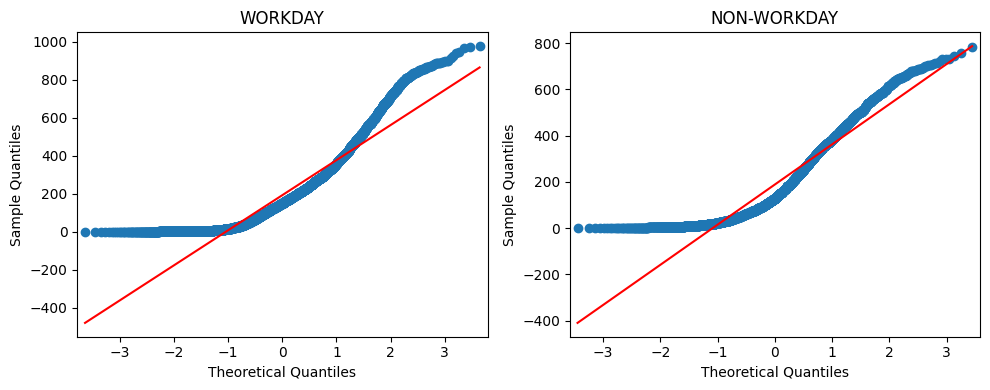

In [ ]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot
fig,axis = plt.subplots(1,2,figsize=(10,4))
qqplot(workday,line='s',ax=axis[0])
qqplot(non_workday,line='s',ax=axis[1])
axis[0].set_title('WORKDAY')
axis[1].set_title('NON-WORKDAY')
plt.tight_layout()
plt.show()

In [ ]:
# Check equality of variances
levene_test = stats.levene(workday, non_workday)
print("Levene’s test p-value:",levene_test.pvalue)

Levene’s test p-value: 0.9437823280916695


In [ ]:
# Perform independent 2-sample t-test (assuming equal variances)
t_stat, p_val = stats.ttest_ind(workday, non_workday, equal_var=True)
print("T-stat:", t_stat)
print("P-value:", p_val)

T-stat: 1.2096277376026694
P-value: 0.22644804226361348


In [ ]:
# Non-parametric alternative (Mann–Whitney U)
u_stat, p_val_mw = stats.mannwhitneyu(workday, non_workday)
print("U-stat:", u_stat)
print("P-value:", p_val_mw)

U-stat: 12868495.5
P-value: 0.9679139953914079


#### **Interpretation of Test Results**

*   Normality tests (**Shapiro–Wilk**) indicates that the rental counts are **not perfectly normally distributed (p < 0.05)**. However, given the large sample size, the **CENTRAL LIMIT THEOREM ensures approximate normality** of the sampling distribution of the mean
*   Variance-equality test (**Levene's test**) indicates **approximately equal variances** across workday and non_workday (p > 0.05)
*   Since the normality assumption was violated, a Mann–Whitney U test was also conducted to verify the robustness of the result.
*   In our data, both t-test and Mann–Whitney had p > 0.05, indicating that (non-)working days do not affect rentals.

### **2. Difference in Rentals Across Weather Types — ANOVA**

#### **Defining Hypotheses**

**H₀:** Mean rental counts are equal across all weather categories.

**H₁:** At least one weather category has a different mean count.

#### **Test Assumptions**

*   Normality of Data
*   Homogeneity of Variances (Equal Variance Assumption)
*   Independence of Observations
*   No Significant Outliers

#### **Hypothesis Testing**

In [ ]:
# Extract groups for each weather
groups_weather = [group['count'].values for name, group in df.groupby('weather')]

/tmp/ipython-input-2648311280.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_weather = [group['count'].values for name, group in df.groupby('weather')]


In [ ]:
# Check normality (Shapiro-Wilk test)
for i, group in enumerate(groups_weather):
    if len(group) >= 50:
        shapiro_weather = stats.shapiro(group)
        print(f"Shapiro-Wilk test p-value for weather group {i+1}: {shapiro_weather.pvalue}")
    else:
        print(f"Skipping Shapiro-Wilk test for weather group {i+1} due to small sample size ({len(group)}).")

Shapiro-Wilk test p-value for weather group 1: 1.5964921477006555e-57
Shapiro-Wilk test p-value for weather group 2: 9.777839106111785e-43
Shapiro-Wilk test p-value for weather group 3: 3.875893017396149e-33
Skipping Shapiro-Wilk test for weather group 4 due to small sample size (1).


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)


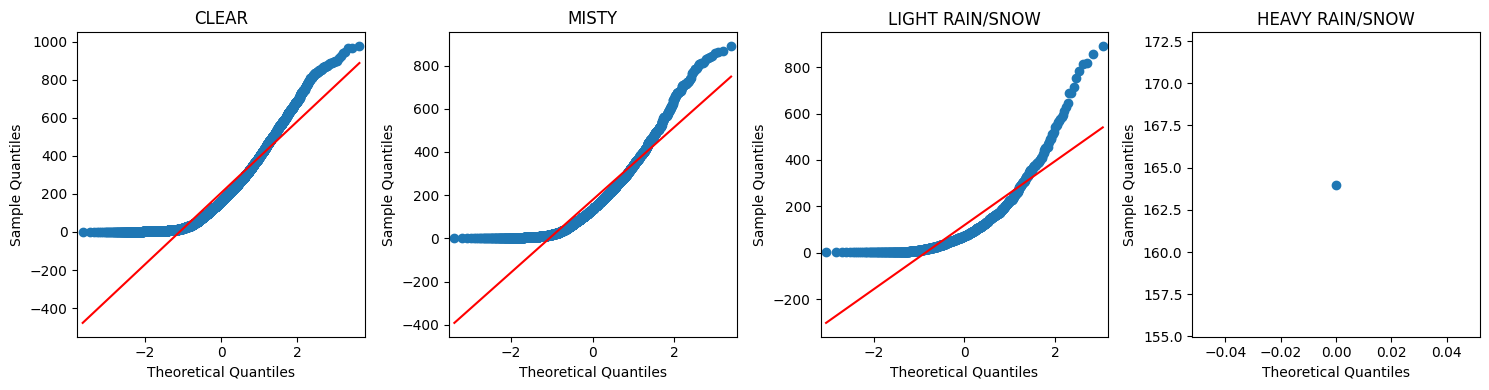

In [ ]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot
fig,axis = plt.subplots(1,4,figsize=(15,4))
for i, group in enumerate(groups_weather):
    qqplot(group,line='s',ax=axis[i])
axis[0].set_title('CLEAR')
axis[1].set_title('MISTY')
axis[2].set_title('LIGHT RAIN/SNOW')
axis[3].set_title('HEAVY RAIN/SNOW')
plt.tight_layout()
plt.show()

In [ ]:
# Check equal variances
levene_weather = stats.levene(*groups_weather)
print("Levene_statistic:",levene_weather[0])
print("Levene_pvalue:",levene_weather[1])

Levene_statistic: 54.85106195954556
Levene_pvalue: 3.504937946833238e-35


In [ ]:
# Perform One-Way ANOVA
f_stat, p_val_anova = stats.f_oneway(*groups_weather)
print("f_statistic:", f_stat)
print("p_value:", p_val_anova)

f_statistic: 65.53024112793265
p_value: 5.482069475935669e-42


In [ ]:
# Non-parametric alternative (Kruskal–Wallis)
h_stat, p_val_kw = stats.kruskal(*groups_weather)
print("h_statistic:", h_stat)
print("p_value:", p_val_kw)

h_statistic: 205.00216514479087
p_value: 3.501611300708679e-44


#### **Interpretation of Test Results**
*   The p-value in **Levene's test** is extremely small (<< 0.05), so we reject the null hypothesis of equal variances across weather groups. This means the **variances** among the different weather groups are **significantly different**.
*   The **ANOVA** shows a highly significant result, indicating that at least one weather group has a different mean count compared to others. This tells us **weather categories significantly affect bike rental counts**.
*   Because Levene’s test indicated unequal variances, the standard ANOVA test (which is based on equal variances' assumption) was interpreted in conjunction with the **Kruskal–Wallis Test (Non-parametric Alternative)** which provides a robust non-parametric alternative **that does not assume equal variances or normality**; it further confirms that the groups differ significantly in their distributions.






### **3. Difference in Rentals Across Seasons — ANOVA**

#### **Defining Hypotheses**

**H₀:** Mean rental counts are the same across seasons.

**H₁:** At least one season differs.

#### **Test Assumptions**

*   Normality of Data
*   Homogeneity of Variances (Equal Variance Assumption)
*   Independence of Observations
*   No Significant Outliers

#### **Hypothesis Testing**

In [ ]:
# Extract group for each season
groups_season = [group['count'].values for name, group in df.groupby('season')]

/tmp/ipython-input-3210807788.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_season = [group['count'].values for name, group in df.groupby('season')]


In [ ]:
# Check normality (Shapiro-Wilk test)
for i, group in enumerate(groups_season):
    if len(group) >= 50:
        shapiro_season = stats.shapiro(group)
        print(f"Shapiro-Wilk test p-value for season group {i+1}: {shapiro_season.pvalue}")

Shapiro-Wilk test p-value for season group 1: 8.749584618867662e-49
Shapiro-Wilk test p-value for season group 2: 6.039374406270491e-39
Shapiro-Wilk test p-value for season group 3: 1.043680518918597e-36
Shapiro-Wilk test p-value for season group 4: 1.1299244409282836e-39


In [ ]:
# Levene’s test for equal variances
levene_season = stats.levene(*groups_season)
print("Levene_statistic:",levene_season[0])
print("Levene_pvalue:",levene_season[1])

Levene_statistic: 187.7706624026276
Levene_pvalue: 1.0147116860043298e-118


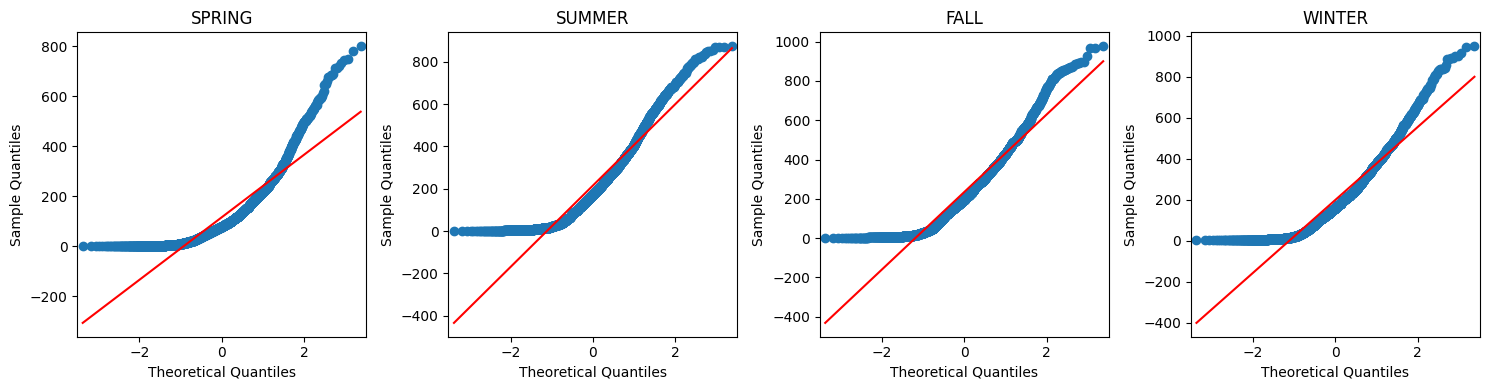

In [ ]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot
fig,axis = plt.subplots(1,4,figsize=(15,4))
for i, group in enumerate(groups_season):
    qqplot(group,line='s',ax=axis[i])
axis[0].set_title('SPRING')
axis[1].set_title('SUMMER')
axis[2].set_title('FALL')
axis[3].set_title('WINTER')
plt.tight_layout()
plt.show()

In [ ]:
# ANOVA
f_stat_season, p_val_season = stats.f_oneway(*groups_season)
print("f_statistic:", f_stat_season)
print("p_value:", p_val_season)

f_statistic: 236.94671081032098
p_value: 6.164843386499654e-149


In [ ]:
# Kruskal–Wallis
h_stat_season, p_val_kw_season = stats.kruskal(*groups_season)
print("h_statistic:", h_stat_season)
print("p_value:", p_val_kw_season)

h_statistic: 699.6668548181988
p_value: 2.479008372608633e-151


#### **Interpretation of Test Results**

* Both **ANOVA and Kruskal–Wallis** yielded p ≪ 0.05, confirming **rental counts differ significantly across seasons**.
* Since variances were unequal [using **Levene's test**], we rely more on the Kruskal–Wallis test for robust inference.

### **4. Dependence Between Weather and Season — CHI-SQUARE TEST**

#### **Defining Hypotheses**

**H₀:** Weather and season are independent.

**H₁:** Weather and season are dependent.

#### **Test Assumptions**
* Variables Should Be Categorical and Discrete
* Categories Must Be Mutually Exclusive
* Adequate Sample Size (>5)
* Observations Must Be Independent

#### **Hypothesis Testing**

In [ ]:
# Create contingency table
contingency = pd.crosstab(df['season'], df['weather'])
print(contingency)

weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0


In [ ]:
# Perform Chi-square test of independence
chi2_stat, p_val_chi, dof, expected = stats.chi2_contingency(contingency)
print("Chi2_statistic:", chi2_stat)
print("p_value:", p_val_chi)

Chi2_statistic: 49.158655596893624
p_value: 1.549925073686492e-07


#### **Interpretation of Test Results**

* Since p < 0.05, we reject H₀, thereby concluding that **weather and season are dependent**.

---

## **COMPREHENSIVE STATISTICAL CONCLUSIONS**

1.  There is **no statistically significant difference** in the number of cycles rented between **working and non-working days**. This implies that Yulu’s **rental activity remains consistent** across weekdays and weekends, possibly due to **balanced demand** from both commuters and leisure users.
2.  Rental activity **varies significantly with weather conditions**. Yulu rentals are likely **higher on clear or partly cloudy days** and **drop during adverse weather** such as rain or mist.
3.  There is a highly **significant seasonal effect** on Yulu rentals. Rental demand is **highest during moderate or pleasant seasons** (e.g., spring or autumn) and **lower during extreme weather seasons** such as winter or heavy monsoon.
4.  There is a **significant association between season and weather**, meaning weather patterns vary systematically with seasons (e.g., higher chances of rain in monsoon or clearer skies in summer).

---

## **BUSINESS TAKEAWAY & ACTIONABLE INSIGHTS**

1.  **Stable Demand Across Workdays and Weekends**: Since rental activity does not significantly differ between working and non-working days, Yulu can maintain a fairly consistent fleet distribution throughout the week.
* **Action**: Avoid drastic reallocation of cycles solely based on weekday/weekend differentiation. Instead, focus operational efforts on other demand drivers like weather and seasonality.
2.  **Weather-Adaptive Fleet Management**: Rental counts fluctuate significantly with weather, with drops during adverse conditions like rain or mist. This suggests the need for dynamic, **weather-responsive resource planning**.
* **Action**: Develop **predictive models integrating weather forecasts** to preemptively adjust fleet size and distribution, ensuring bikes are concentrated in favorable weather locations and **minimizing operational costs during inclement weather**.
3.  **Seasonal Demand Optimization**: The strong seasonal effect — higher rentals during pleasant seasons — indicates demand cycles throughout the year.
* **Action**: Plan marketing promotions, **seasonal discounts**, and maintenance schedules aligned with peak seasons (spring, autumn) to maximize utilization, and consider **cost control strategies during low-demand winter or monsoon periods**.
4.  **Integrated Weather-Season Strategy**: The significant association between weather and season underscores the importance of combining these variables in demand forecasting. Certain weather patterns systematically align with seasons, influencing usage patterns.
* **Action**: Implement an integrated demand forecasting system incorporating both weather and seasonal trends to optimize fleet allocation, ensure availability where demand surges, and **reduce oversupply during off-peak weather-season combinations**.

---
---
---

.

.

.

.

.

.

.